### 1. Laboratorio de la clase 1: Introducción y contexto

En este laboratorio vamos a aprender y a repasar conceptos básicos de limpieza, procesamiento y visualización de datos, así como la implementación de algunos algoritmos básicos de aprendizaje automático. En el primer ejercicio de este laboratorio, vamos a realizar una regresión polinómica usando datos generados artificialmente con la que aprenderemos y recordaremos conceptos básicos de aprendizaje automático tales como la división de datos entre datos de entrenamiento y de testeo. También vamos a evaluar el desempeño del modelo que construiremos, y finalmente vamos a usar técnicas de validación cruzada para encontrar los hiperparámetros óptimos para el modelo. Esta actividad corta nos brindará las bases conceptuales que usaremos en la segunda parte del laboratorio, en la cual usaremos un set de datos de la sección de telemercadeo de un banco, con el fin de predecir si la estrategia de telemercadeo del banco será eficiente en nuevos clientes.

### 2. Regresión polinómica

El objetivo de esta actividad es construir un modelo que, a partir de variables que no están linealmente relacionadas, nos permita hacer predicciones dados nuevos datos de entrada. Para lograr esto, empecemos importando las librerías que vamos a usar durante este ejercicio:

In [1]:
# Librerías necesarias 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.compose import TransformedTargetRegressor

Los datos que usaremos para entrenar el modelo los generamos de manera artificial, escogiendo una función (en este caso la función seno) y añadiendo ruido aleatorio:

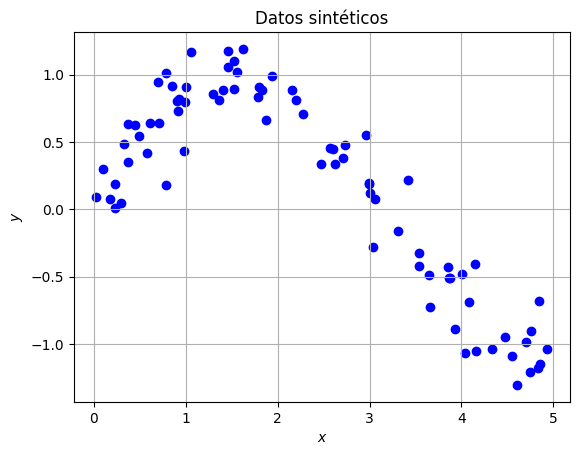

In [3]:
# Generación de datos sintéticos
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.2, size=X.shape[0]) # El método ravel() aplana el array

# Visualización de los datos
plt.scatter(X, y, color='blue')
plt.grid()
plt.title('Datos sintéticos')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()

Ahora procedemos a usar estos datos para crear el modelo. Para empezar, intentemos usar un modelo que sea un polinomio de segundo grado:

In [4]:
# Construcción del modelo incluyendo normalización de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
inner_pipe = make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), LinearRegression())
model = TransformedTargetRegressor(regressor=inner_pipe, transformer=StandardScaler())
model.fit(X_train, y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('standardscaler',
                                                      StandardScaler()),
                                                     ('polynomialfeatures',
                                                      PolynomialFeatures()),
                                                     ('linearregression',
                                                      LinearRegression())]),
                           transformer=StandardScaler())

Habiendo entrenado el modelo, a continuación evaluamos su desempeño usando la métrica MSE. Para hacer esta evaluación, usamos el set de testeo.

Evalucación del modelo con plinomio de grado 2: MSE = 0.0835


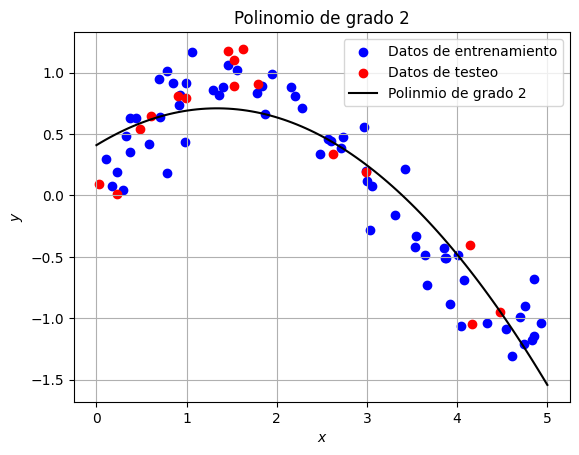

In [5]:
# Predicciones y evalucación del modelo usanndo el set de testeo y MSE
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Evalucación del modelo con plinomio de grado 2: MSE = {mse:.4f}")

# Visualización de los resultados
X_plot = np.linspace(0, 5, 100).reshape(-1, 1)
y_plot = model.predict(X_plot)
plt.scatter(X_train, y_train, color='blue', label='Datos de entrenamiento')
plt.scatter(X_test, y_test, color='red', label='Datos de testeo')
plt.plot(X_plot, y_plot, color='black', label='Polinmio de grado 2')
plt.title(r"Polinomio de grado 2")
plt.grid()
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.legend()
plt.show()

Se ve bien, pero podría mejorar... ¡Para ver el orden óptimo del polinomio que mejor se ajuste a los datos, podemos hacer validación cruzada!

Mejor grado de la validación cruzada: 4


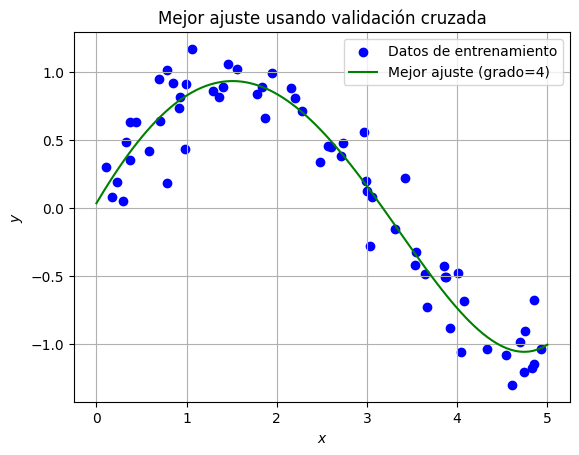

In [6]:
# Validación cruzada para encontrar el mejor grado del polinomio
param_grid = {'regressor__polynomialfeatures__degree': [1, 2, 3, 4, 5, 6, 7]}
base_pipe = make_pipeline(StandardScaler(), PolynomialFeatures(), LinearRegression())
model_cv = TransformedTargetRegressor(regressor=base_pipe, transformer=StandardScaler())

grid = GridSearchCV(model_cv, param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

best_deg = grid.best_params_['regressor__polynomialfeatures__degree']
print("Mejor grado de la validación cruzada:", best_deg)

# Visualización del mejor ajuste
y_best = grid.predict(X_plot)
plt.scatter(X_train, y_train, color='blue', label='Datos de entrenamiento')
plt.plot(X_plot, y_best, color='green', label=f"Mejor ajuste (grado={best_deg})")
plt.title("Mejor ajuste usando validación cruzada")
plt.xlabel(r"$x$")
plt.grid()
plt.ylabel(r"$y$")
plt.legend()
plt.show()